In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Specify the parent directory containing train and validation subdirectories
train_dir = '/content/drive/MyDrive/archive/skin-disease-datasaet/train_set'
val_dir = '/content/drive/MyDrive/archive/skin-disease-datasaet/test_set'

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

# Model training
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
model_save_path = '/content/drive/MyDrive/skin_disease_model.h5'
model.save(model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(model_save_path)

# Load and preprocess the new image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Replace 'path_to_new_image.jpg' with the path to your new image
new_image_path ='/content/drive/MyDrive/Copy of 96_VI-chickenpox (15).jpg'
new_image = load_and_preprocess_image(new_image_path)

# Predict the class of the new image
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f"Predicted class index: {predicted_class[0]}")


1/1 [==============================] - 0s 204ms/step
Predicted class index: 6


1/1 [==============================] - 0s 236ms/step


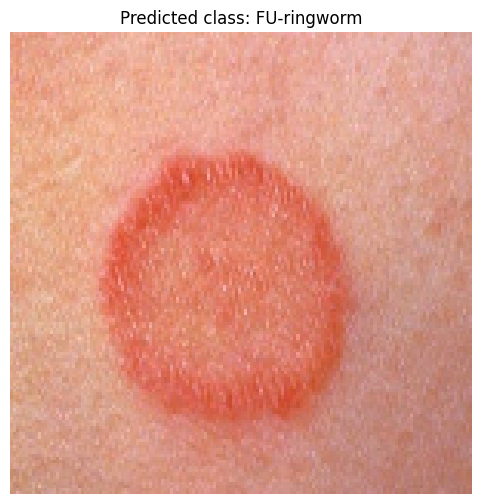

Predicted class index: 4
Predicted class name (folder): FU-ringworm


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model(model_save_path)

# Load class names
class_names = sorted(os.listdir(train_dir))  # Assuming train_dir has the same structure

# Load and preprocess the new image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

# Replace 'path_to_new_image.jpg' with the path to your new image
new_image_path = '/content/drive/MyDrive/ring.jpg'
img, new_image = load_and_preprocess_image(new_image_path)

# Predict the class of the new image
predictions = model.predict(new_image)
predicted_class_index = np.argmax(predictions, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.axis('off')
plt.show()

print(f"Predicted class index: {predicted_class_index[0]}")
print(f"Predicted class name (folder): {predicted_class_name}")


1/1 [==============================] - 0s 177ms/step


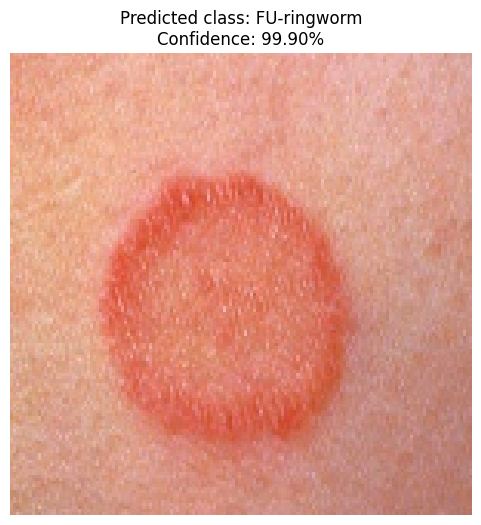

Predicted class index: 4
Predicted class name (folder): FU-ringworm
Confidence: 99.90%
Symptoms: Itchy, red, circular rash with clearer center
Diagnosis: Clinical examination and fungal culture


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model(model_save_path)

# Define the class names and their corresponding details
class_names = sorted(os.listdir(train_dir))  # Assuming train_dir has the same structure

disease_details = {
    'FU-nail-fungus': {'symptoms': 'Itchy nails, discolored nails, thickened nails', 'diagnosis': 'Clinical examination and nail culture'},
    'FU-ringworm': {'symptoms': 'Itchy, red, circular rash with clearer center', 'diagnosis': 'Clinical examination and fungal culture'},
    'VI-shingles': {'symptoms': 'Painful rash with blisters, typically on one side of the body', 'diagnosis': 'Clinical examination and history of chickenpox'},
    'BA-impetigo': {'symptoms': 'Red sores that quickly turn into honey-colored crusts', 'diagnosis': 'Clinical examination and bacterial culture'},
    'FU-athlete-foot': {'symptoms': 'Itchy, red, scaly rash between the toes', 'diagnosis': 'Clinical examination and fungal culture'},
    'VI-chickenpox': {'symptoms': 'Itchy rash with red spots and blisters', 'diagnosis': 'Clinical examination and history of exposure'},
    'PA-cutaneous-larva-migrans': {'symptoms': 'Red, itchy rash that moves across the skin', 'diagnosis': 'Clinical examination and history of exposure to contaminated soil'},
    'BA-cellulitis': {'symptoms': 'Red, swollen, and painful skin, often with fever', 'diagnosis': 'Clinical examination and bacterial culture'}
}

# Load and preprocess the new image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

# Replace 'path_to_new_image.jpg' with the path to your new image
new_image_path ='/content/drive/MyDrive/ring.jpg'
img, new_image = load_and_preprocess_image(new_image_path)

# Predict the class of the new image
predictions = model.predict(new_image)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class_name = class_names[predicted_class_index[0]]
confidence = np.max(predictions) * 100  # Confidence in percentage

# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()

# Print the prediction and additional details
if confidence < 75:
    print("Prediction confidence is low. Unable to confidently identify the skin disease.")
else:
    details = disease_details.get(predicted_class_name, {'symptoms': 'N/A', 'diagnosis': 'N/A'})
    print(f"Predicted class index: {predicted_class_index[0]}")
    print(f"Predicted class name (folder): {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Symptoms: {details['symptoms']}")
    print(f"Diagnosis: {details['diagnosis']}")


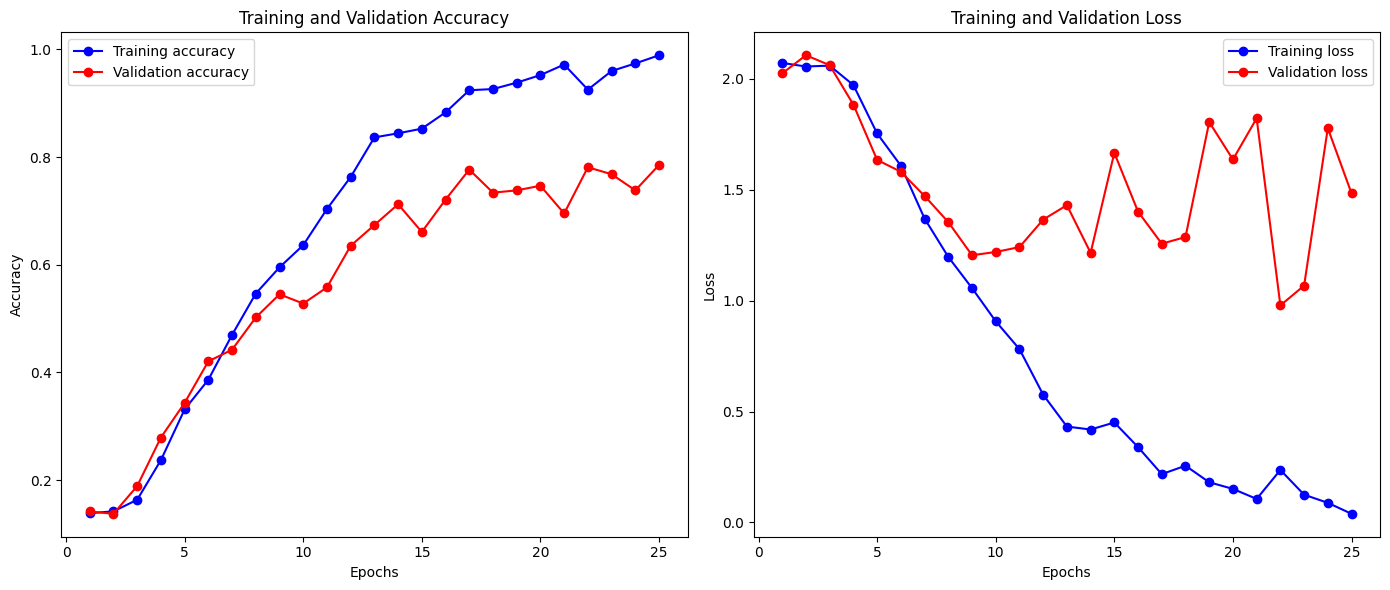

In [ ]:
import matplotlib.pyplot as plt

# Given training history values
epochs = range(1, 26)
accuracy = [0.1385, 0.1418, 0.1634, 0.2370, 0.3312, 0.3864, 0.4697, 0.5465, 0.5952, 0.6364,
            0.7035, 0.7630, 0.8366, 0.8442, 0.8528, 0.8831, 0.9242, 0.9264, 0.9383, 0.9524,
            0.9719, 0.9253, 0.9600, 0.9740, 0.9892]
val_accuracy = [0.1416, 0.1373, 0.1888, 0.2790, 0.3433, 0.4206, 0.4421, 0.5021, 0.5451, 0.5279,
                0.5579, 0.6352, 0.6738, 0.7124, 0.6609, 0.7210, 0.7768, 0.7339, 0.7382, 0.7468,
                0.6953, 0.7811, 0.7682, 0.7382, 0.7854]
loss = [2.0709, 2.0549, 2.0589, 1.9712, 1.7531, 1.6080, 1.3697, 1.1969, 1.0564, 0.9067,
        0.7814, 0.5760, 0.4323, 0.4190, 0.4507, 0.3397, 0.2179, 0.2559, 0.1813, 0.1514,
        0.1062, 0.2367, 0.1253, 0.0886, 0.0392]
val_loss = [2.0240, 2.1056, 2.0609, 1.8830, 1.6339, 1.5806, 1.4715, 1.3538, 1.2044, 1.2191,
            1.2411, 1.3649, 1.4301, 1.2152, 1.6658, 1.4008, 1.2563, 1.2864, 1.8046, 1.6359,
            1.8215, 0.9783, 1.0674, 1.7769, 1.4832]

def plot_training_history(epochs, accuracy, val_accuracy, loss, val_loss):
    # Plot training and validation accuracy
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(epochs, accuracy, val_accuracy, loss, val_loss)


In [2]:
!pip install gradio


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━

In [6]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the model
model = load_model( '/content/drive/MyDrive/skin_disease_model.h5')

# Define class names and their details
class_names = ['FU-nail-fungus', 'FU-ringworm', 'VI-shingles', 'BA-impetigo', 'FU-athlete-foot', 'VI-chickenpox', 'PA-cutaneous-larva-migrans', 'BA-cellulitis']
class_details = {
    'FU-nail-fungus': {'symptoms': 'Itchy nails, discolored nails, thickened nails', 'diagnosis': 'Clinical examination and nail culture'},
    'FU-ringworm': {'symptoms': 'Itchy, red, circular rash with clearer center', 'diagnosis': 'Clinical examination and fungal culture'},
    'VI-shingles': {'symptoms': 'Painful rash with blisters, typically on one side of the body', 'diagnosis': 'Clinical examination and history of chickenpox'},
    'BA-impetigo': {'symptoms': 'Red sores that quickly turn into honey-colored crusts', 'diagnosis': 'Clinical examination and bacterial culture'},
    'FU-athlete-foot': {'symptoms': 'Itchy, red, scaly rash between the toes', 'diagnosis': 'Clinical examination and fungal culture'},
    'VI-chickenpox': {'symptoms': 'Itchy rash with red spots and blisters', 'diagnosis': 'Clinical examination and history of exposure'},
    'PA-cutaneous-larva-migrans': {'symptoms': 'Red, itchy rash that moves across the skin', 'diagnosis': 'Clinical examination and history of exposure to contaminated soil'},
    'BA-cellulitis': {'symptoms': 'Red, swollen, and painful skin, often with fever', 'diagnosis': 'Clinical examination and bacterial culture'}
}

def predict_skin_disease(img):
    # Preprocess the image
    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the class
    predictions = model.predict(img_array)
    confidence = np.max(predictions) * 100
    predicted_class = class_names[np.argmax(predictions)]

    if confidence < 75:
        return "Confidence is too low to make a prediction. Confidence: {:.2f}%".format(confidence)
    else:
        details = class_details[predicted_class]
        return (
            f"Predicted: {predicted_class} with {confidence:.2f}% confidence\n"
            f"Symptoms: {details['symptoms']}\n"
            f"Diagnosis: {details['diagnosis']}"
        )

# Create Gradio interface
interface = gr.Interface(
    fn=predict_skin_disease,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Skin Disease Classifier",
    description="Upload an image of a skin condition and get a prediction with confidence percentage."
)

# Launch the interface
interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://191af924d8094de0e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 18ms/step
Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 